<a href="https://colab.research.google.com/github/Nikolovski237/BiteConnect/blob/main/BTCPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries

In [18]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Get the crypto quote

In [27]:
df = yf.download('BTC-USD', start='2020-06-14', end='2024-06-14')

[*********************100%%**********************]  1 of 1 completed


Show data

In [28]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-14,9477.553711,9482.270508,9347.593750,9386.788086,9386.788086,18991732746
2020-06-15,9386.035156,9504.860352,8990.175781,9450.702148,9450.702148,26699704768
2020-06-16,9454.266602,9579.430664,9400.445312,9538.024414,9538.024414,21565537209
2020-06-17,9533.784180,9540.422852,9327.339844,9480.254883,9480.254883,20177709879
2020-06-18,9481.567383,9482.782227,9328.395508,9411.840820,9411.840820,17770083003


Get the number of rows and columns in the data set

In [29]:
df.shape

(1461, 6)

Visualize the closing price history

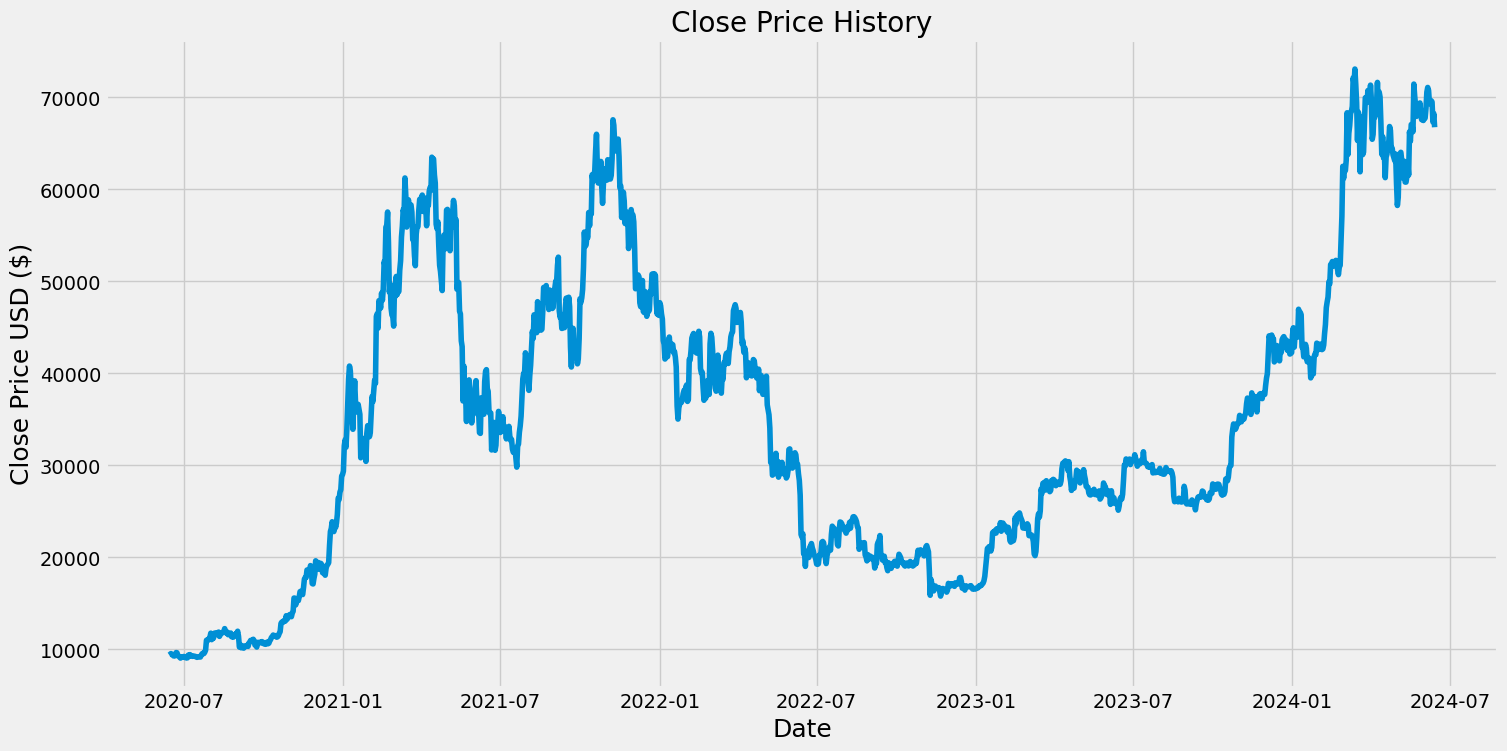

In [30]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Create a new dataframe with only the 'Close' column

In [31]:
data = df.filter(['Close'])

Convert the dataframe to a numpy array

In [32]:
dataset = data.values


Get the number of rows to train the model


In [33]:
training_data_len = math.ceil(len(dataset) * .8)

Scale the data

In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

Create the training data set

In [39]:
train_data = scaled_data[0:training_data_len, :]

In [41]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00533116, 0.00632922, 0.00769282, 0.00679071, 0.00572238,
       0.00378881, 0.00448093, 0.00403259, 0.00942138, 0.00912375,
       0.00418844, 0.00342644, 0.00183527, 0.        , 0.00153333,
       0.00227152, 0.00144605, 0.00285665, 0.00121833, 0.0006545 ,
       0.00136009, 0.00044586, 0.00515449, 0.00323068, 0.00597991,
       0.00363186, 0.00364497, 0.00304438, 0.00360894, 0.0030954 ,
       0.00308915, 0.00230248, 0.00135602, 0.00165529, 0.00177472,
       0.00219286, 0.00185578, 0.00514533, 0.00749511, 0.00836504,
       0.00767515, 0.00986479, 0.01342601, 0.03038007, 0.02916127,
       0.03209147, 0.03225928, 0.03557376, 0.04238417, 0.03135982,
       0.0343695 , 0.03373775, 0.04218788, 0.04269931, 0.03991501,
       0.04229755, 0.04107474, 0.04423492, 0.03693324, 0.03965676])]
[0.04276745670729759]

[array([0.00533116, 0.00632922, 0.00769282, 0.00679071, 0.00572238,
       0.00378881, 0.00448093, 0.00403259, 0.00942138, 0.00912375,
       0.00418844, 0.00342644, 0.00

Convert the x_train and y_train to numpy arrays

In [42]:
x_train, y_train = np.array(x_train), np.array(y_train)

Reshape the data

In [43]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1109, 60, 1)

Build the LSTM model

In [44]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Compile the model

In [58]:
model.compile(optimizer='adam', loss='mean_squared_error')

Train the model

In [59]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1109/1109 [==============================] - 38s 30ms/step - loss: 0.0014


Create the testing data set

In [60]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

Convert the data to a numpy array

In [61]:
x_test = np.array(x_test)

Reshape the data

In [62]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Get the model's predicted price values

In [63]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

10/10 [==============================] - 1s 15ms/step


Get the root mean squared error (RMSE)

In [64]:
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

2967.50947746484

Plot the data

In [65]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-65-8f78faa8f9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Visualize the data

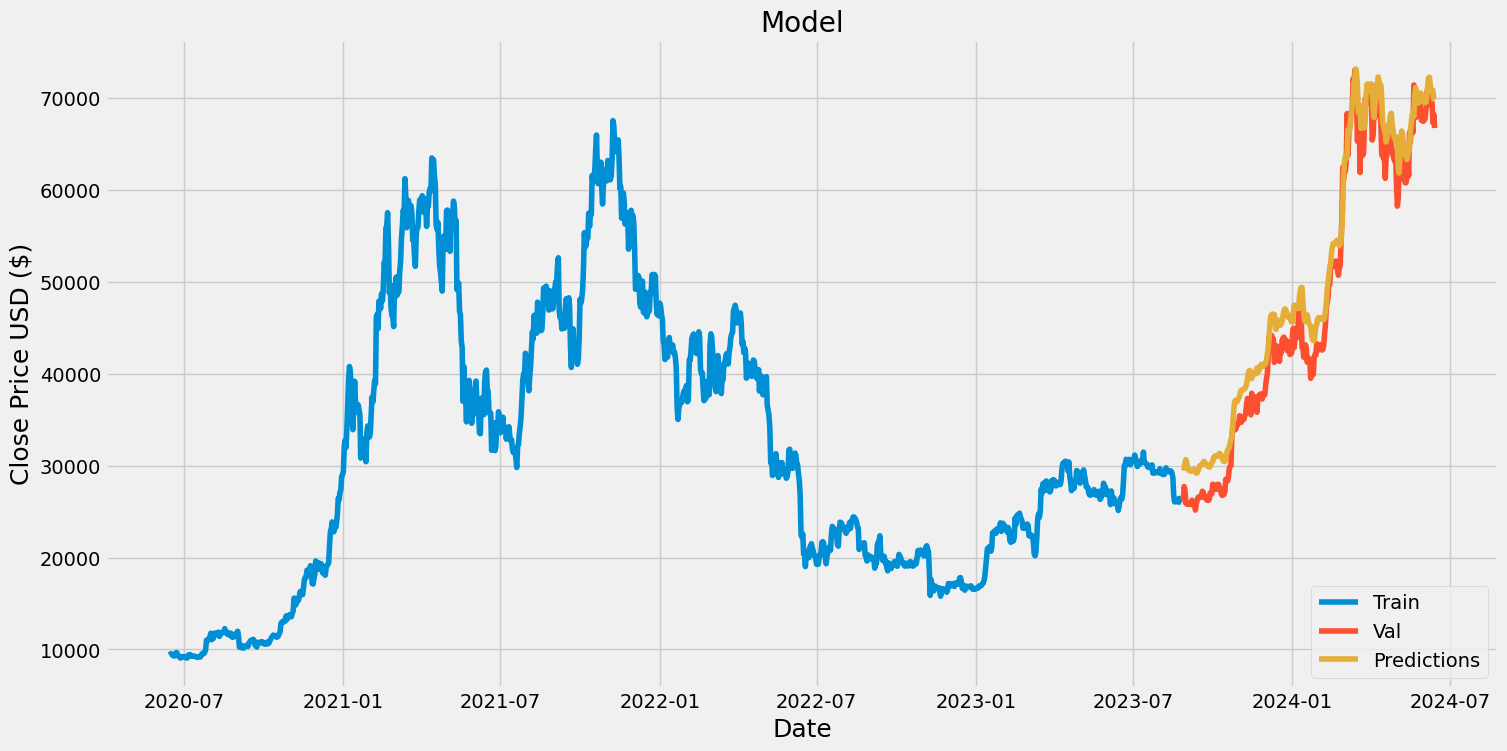

In [66]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Show the valid and predicted prices

In [67]:
valid.tail()

,Close,Predictions
Date,,
2024-06-09,69647.992188,70731.195312
2024-06-10,69512.281250,70744.984375
2024-06-11,67332.031250,70866.546875
2024-06-12,68241.187500,69884.921875
2024-06-13,66756.398438,69788.492188


In [73]:
# Get the quote
btc_quote = yf.download('BTC-USD', start='2020-06-14', end='2024-06-12')
# Create a new dataframe
new_df = btc_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 26ms/step
[[69884.92]]


In [74]:
try:
    btc_quote2 = yf.download('BTC-USD', start='2024-06-13', end='2024-06-14')  # Adjust end date to ensure the data includes the entire day
    if btc_quote2.empty:
        raise ValueError("No data found for BTC-USD for the specified date.")
    print(btc_quote2['Close'])
except Exception as e:
    print(f"Error downloading data: {e}")

[*********************100%%**********************]  1 of 1 completed

Date
2024-06-13    66756.398438
Name: Close, dtype: float64
